# Graded Exercise 1

**Date: 25.10.2019**

Welcome to the first graded exercise. 

You are asked to fill in the code in a couple of cells throughout the exercise. For each such cell we provided tests which are run along with the cell and save your results to a file. The cells are independent of each other and you will receive points for each individual cell. The tests immediately show you whether your code is correct.

Before you finish, please make sure to **upload two files to Moodle**:
* **graded_exercise_1.ipynb**
* **answers_SCIPER.npz (e.g. "answers_280595.npz")**

Good luck! :)

In [11]:
import random
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
from helpers.helper import KMEANSHelper

# Unit tests.
import tests.tests as tests

# set matplotlib to display all plots inline with the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Enter your sciper number here
sciper_number = 123456  # e.g. 123456

## 1 K-means Clustering (? points)

In this part, you are asked to understand and complete the K-means algorithm including important conceptions you have learned from the lecture and exercise.

In this graded seesion, you will apply the K-means algorithm to compress an image. In this case, given a RGB image, you can cluster all pixels into $K$ clusters so that the original image can be compressed into images with only K colors.

### 1.1 K-means (? points)

In [13]:
# Please do not change the seed, we keep the same seed to evaluate the result.
seed = 123
def init_centers(data, K):
    """
    Randomly pick K data from the input data as starting points for centers.
    
    input: 
        data: ndarray of shape (N, d) where N is the number of pixels, d is number of features.\n",
        K: int, the number of clusters.
    output:
        center: ndarray of shape (K, d). Initial cluster centers.
    
    
    """    
    np.random.seed(seed)
    random_idx = np.random.permutation(data.shape[0])
    # select the first K random index and use these index to select centers from data
    # to fill by the student
    center = data[random_idx[:K]]
       
    return center

tests.test_kmeans_init_centers(locals())


[WARNING]: Output directory /Users/kicirogl/workspace/intro-ml-c233/archive/graded_exercises/fall_2019/graded_exercise_1_release/grading/data does not exist, it will be created
[test_kmeans_init_centers] No problems detected. Your code is correct! 😎


In [14]:
 def compute_distance(data, centers, K):
    """
    Compute the euclidean distance between each datapoint and each center.
    
    input:    
        data: ndarray of shape (N, d) where N is the number of pixels, d is number of features.
        centers: ndarray of shape (K, d). Centers of K clusters.
        K: number of clusters.
        
    output:
        distance: ndarray of shape (N, K).
    """
    distance = np.zeros((data.shape[0], K))
    for k in range(K):
        
        # compute the euclidean distance for each data to each center
         # to fill by the student
        center_k = centers[k, :]
        l2distance_k = np.sqrt(((data - center_k)**2).sum(axis=1))
        distance[:, k] = l2distance_k
        
    return distance

tests.test_kmeans_compute_distance(locals())

[test_kmeans_compute_distance] No problems detected. Your code is correct! 😎


In [15]:
def find_closest_cluster(distance):
    """
    Assign cluster labels to datapoints according to minimum input distance.
    
    input:
        distance: ndarray of shape (N, K). 

    output:
        labels: ndarray of shape (N,) where each value means the cluster label that is assigned to the datapoint.
    """
    # to fill by the student
    labels = np.argmin(distance, axis=1)
    return labels

tests.test_kmeans_find_closest_cluster(locals())

[test_kmeans_find_closest_cluster] No problems detected. Your code is correct! 😎


In [16]:
def kmean(data, K, max_iter):
    """
    Main function that combines all the former functions together to build the K-means algorithm.
    
    Input: 
        data: ndarray of shape (N, d) where N is the number of pixels, d is number of features.
        K: int, the number of clusters.
    
    output:
        center: ndarray of shape (N, d). Final cluster centers.
        labels: ndarray of shape (N,) where each value means the cluster label that assigned to the data.
    """
    centers = init_centers(data, K)
    for i in range(max_iter):
        old_centers = centers
        distance = compute_distance(data, old_centers, K)
        labels = find_closest_cluster(distance)
        centers = KMEANSHelper.compute_centers(data, labels, K)
        if np.all(old_centers == centers):
            break
    return centers, labels

The shape of input image is:  (300, 400, 3)
(10, 3) (120000,)


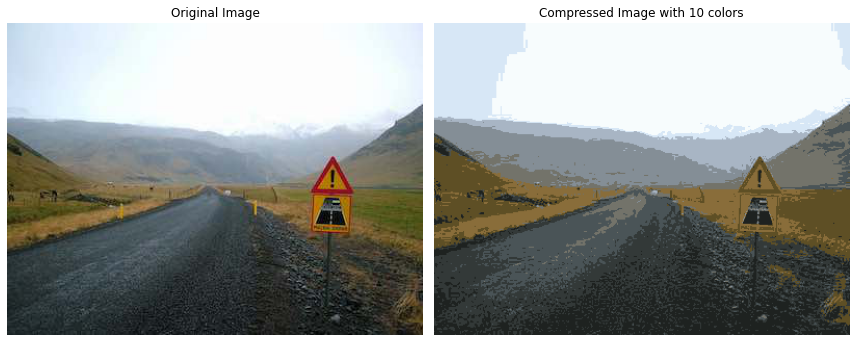

In [17]:
# we can see how K-Means works for compressing image
img = imread('road.jpg') # jpg
img_size = img.shape
print ('The shape of input image is: ', img_size)

# Reshape it to be 2-dimensio
X = img.reshape(img_size[0] * img_size[1], img_size[2])
# Run the Kmeans algorithm
K = 10
centers, labels = kmean(X, K, 100)
print(centers.shape, labels.shape)

# Use the centroids to compress the image, clip it to image range
X_compressed = centers[labels]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 300 * 400 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with %d colors'%(K))
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

## 2 kNN (? points)

### 2.1 Weighted $k$-Nearest Neighbors Classifier



Traditional $k$-NN assigns as label to a given example the most popular label from its surroundings. The method is very intuitive, and can be summarized as:
- Compute the distance between the example to classify and all the training examples.
- Select the closest $k$ training examples.
- Assign to the example the most common label among those neighbors.

However, in the **weighted k-NN**, instead of majority vote of the nearest neighbor labels, we assign a weight to each nearest neighbor that is inversely proportional to its distance from query point. Then to predict the label of the query point, the weights of the neighbors belonging to same label is summed up. The label with maximum sum is declared as query's label.

Formally, for a query point $x_{q}$, $(x_{i},y_{i}) \in NN_{k}(x_q)$ for i =1,2...k are k-nearest neighbours with label $y_i \in [0,M-1]$ $M$ is number of labels/classes , then the predicted label $y_{q}$ with weighted k-NN is given by

\begin{align}
        scores(v) &=  \sum_{(x_i,y_i)\in NN_{k}(x_{q})}  w_{i} \times I(v,y_i)  \\
        w_{i} &= \frac{1.0}{distance(x_{q},x_{i})}\\
        y_q &= \underset{v}{\operatorname{argmax}} scores(v) 
\end{align}

where 
$$
I(v,y_i) = \begin{cases} 1, v=y_{i} \\ 0, v \neq y_i \end{cases} \\
v \in [0, M-1]
$$

**You are asked to implement the function below to predict label of a query point given the k- nearest neighbour labels and distances from them.**

0th nearest neighbour with label 0 contributes weight of 18.007265090942383
1th nearest neighbour with label 1 contributes weight of 6.496354103088379
2th nearest neighbour with label 0 contributes weight of 5.380483627319336
3th nearest neighbour with label 1 contributes weight of 5.060152053833008
4th nearest neighbour with label 1 contributes weight of 3.3279929161071777
5th nearest neighbour with label 1 contributes weight of 3.306144952774048
6th nearest neighbour with label 0 contributes weight of 3.235058069229126
7th nearest neighbour with label 0 contributes weight of 3.2251975536346436
8th nearest neighbour with label 1 contributes weight of 3.1503384113311768
9th nearest neighbour with label 1 contributes weight of 3.148395538330078
Predicted label: 0
[test_knn_weighted] No problems detected. Your code is correct! 😎


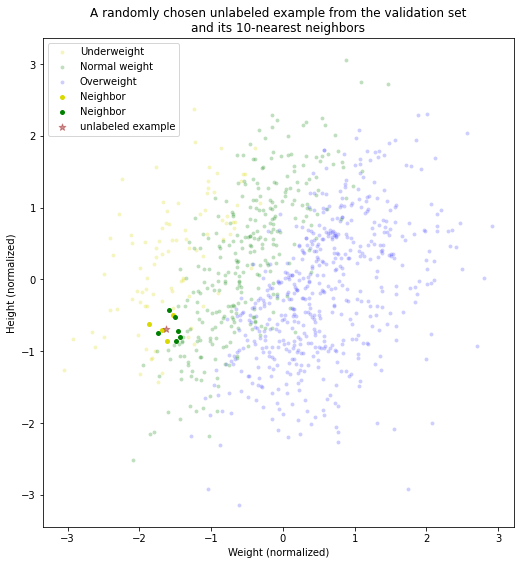

In [18]:
"""
Input:
  neighbor_labels : labels of k-nearest neighbours 
  neighbor_distances: distances of k-nearest neighbours from query point
  num-classes: num of classes/labels in the dataset
    
Output:
  predicted_label: label of the query point predicted using weighted k-NN algorithm
  w: weights of the neighbors
"""

def predict_label_with_weighted_distance(neighbor_labels, neighbor_distances, num_classes):
   
    # save the final sum of distances for each class/label
    scores = np.zeros(num_classes, dtype=np.float32)  
    # save the weight of each neighbor
    w = np.zeros(len(neighbor_labels), dtype=np.float32)
    
    for  j in range(len(neighbor_labels)):   
        # WRITE YOUR CODE HERE 
        w[j] = 1/neighbor_distances[j]
        scores[neighbor_labels[j]] += w[j]    
    
    predicted_label = np.argmax(scores)
    return predicted_label, w

# Test your implementation.
tests.test_knn_weighted(locals())

## 3 Linear Regression (? points)

### 3.1. Min-max normalization:

Write the `min-max normalization()` function that takes a dataset, a max value and a min value. Also fill in the function `find_min_max_values()` that lets you find the minimum value and maximum value of each **feature**.

To recall how the min max normalization works:
$$\tilde{x}^{(d)}_i = \frac{x^{(d)}_i - x^{(d)}_{min}}{x^{(d)}_{max}-x^{(d)}_{min}}$$

where 

$$ x^{(d)}_{min} = \min_{i=1}^N x^{(d)}_i \\
x^{(d)}_{max} = \max_{i=1}^N x^{(d)}_i 
$$

Keep in mind that your data does not have a bias feature.

In [19]:
def min_max_normalization(dataset, min_value, max_value):
    """ Normalizes the dataset by linearly scaling its features
    to range [0, 1].
    
    Args:
        dataset (np.array): Dataset, shape (N, D), N is number of 
            data samples, D is number of features.
        min_value (np.array): Per-feautre min value, shape (D, ).
        max_value (np.array): Per-feautre max value, shape (D, ).
    
    Returns:
        np.array: Normalized dataset, shape (N, D).
    """

    ### YOUR CODE HERE
    min_value = np.min(dataset, axis=0, keepdims=True)
    max_value = np.max(dataset, axis=0, keepdims=True)
    ds_normalized = (dataset-min_value)/(max_value-min_value)
    return ds_normalized
    ###
    
def find_min_max_values(dataset):
    """ Finds the minimum and maximum value for each feature.
    
    Args:
        dataset (np.array): Dataset, shape (N, D), N is number of 
            data samples, D is number of features.
    
    Returns:
        min_value (np.array): Per-feautre min value, shape (D, ).
        max_value (np.array): Per-feautre max value, shape (D, ).
    """
    
    ### YOUR CODE HERE
    min_value = np.min(dataset, axis=0)
    max_value = np.max(dataset, axis=0)
    return min_value, max_value
    ###

# Test your implementation.
tests.test_normalization(locals())

[test_normalization] No problems detected. Your code is correct! 😎


### 3.2. What do the weights mean?

Assume we have normalized our data, added a bias term (column of ones as the 0'th feature), and then trained it with linear regression. Let us consider what the weights of our trained model mean. 

Can you, by looking at the  weights, tell us the least influential (feature that affects the label the least), and the most influential features? Fill in the `find_least_and_most_influential_features()` function to return the feature indices.

**When finding the results, ignore the bias feature. This means that you should never return the bias feature index 0 as a result.**

In [20]:
def find_least_and_most_influential_features(w):
    #YOUR CODE HERE
    least_inf =  np.argmin(np.abs(w[1:]))+1
    most_inf =  np.argmax(np.abs(w[1:]))+1
    return least_inf, most_inf
# Test your implementation.
tests.test_influential_features(locals())

[test_influential_features] No problems detected. Your code is correct! 😎
